<a href="https://www.kaggle.com/code/filipkin/starter?scriptVersionId=202418795" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import math
import warnings




In [2]:
df = pd.read_csv("/kaggle/input/warsaw-flat-rent-prices/data_clean.csv")

df.head()



,area,room_num,floor,total_floor,year_built,poddasze,dish_washer(zmywarka),fridge(lodówka),furniture(meble),oven(piekarnik),...,district_ Warszawa,district_ Wawer,district_ Wesoła,district_ Wilanów,district_ Wola,district_ Włochy,district_ mazowieckie,district_ Śródmieście,district_ Żoliborz,gross_price
0,37.0,2.0,1.0,4.000000,2001.453488,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2435.244186
1,38.0,2.0,1.0,5.802326,2020.000000,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2175.000000
2,57.0,3.0,1.0,15.000000,1984.000000,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3300.000000
3,63.0,2.0,4.0,5.000000,2005.000000,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2585.046512
4,65.0,3.0,3.0,4.000000,1938.000000,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3424.918605


In [3]:
df.describe()

,area,room_num,floor,total_floor,year_built,poddasze,dish_washer(zmywarka),fridge(lodówka),furniture(meble),oven(piekarnik),...,district_ Warszawa,district_ Wawer,district_ Wesoła,district_ Wilanów,district_ Wola,district_ Włochy,district_ mazowieckie,district_ Śródmieście,district_ Żoliborz,gross_price
count,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,...,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000
mean,45.457661,1.985311,3.525101,6.530389,2010.896005,0.002016,0.622120,0.971774,0.938652,0.834677,...,0.005472,0.012097,0.004032,0.036002,0.147465,0.022177,0.012673,0.098502,0.030242,2743.665343
std,17.593785,0.746499,2.612843,3.336553,353.907361,0.044863,0.484927,0.165641,0.240002,0.371525,...,0.073783,0.109334,0.063381,0.186323,0.354620,0.147281,0.111874,0.298036,0.171277,938.332497
min,3.000000,1.000000,0.000000,1.000000,1890.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,581.418605
25%,35.000000,2.000000,1.000000,4.000000,1992.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2200.000000
50%,42.000000,2.000000,3.000000,6.000000,2004.319767,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2587.476744
75%,53.000000,2.000000,5.000000,8.000000,2017.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3000.000000
max,220.000000,7.000000,15.000000,30.000000,20202.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11500.000000


In [4]:
df.isna().sum()

area                     0
room_num                 0
floor                    0
total_floor              0
year_built               0
                        ..
district_ Włochy         0
district_ mazowieckie    0
district_ Śródmieście    0
district_ Żoliborz       0
gross_price              0
Length: 85, dtype: int64

In [5]:
warnings.simplefilter(action='ignore', category=FutureWarning)

df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [6]:
df.isna().sum()

area                     0
room_num                 0
floor                    0
total_floor              0
year_built               0
                        ..
district_ Włochy         0
district_ mazowieckie    0
district_ Śródmieście    0
district_ Żoliborz       0
gross_price              0
Length: 85, dtype: int64

<Axes: xlabel='area', ylabel='Count'>

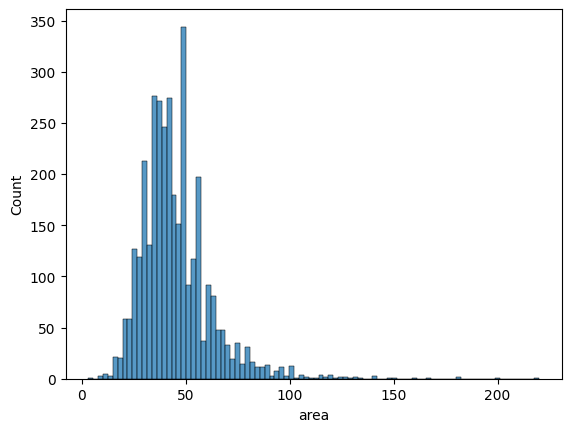

In [7]:
sns.histplot(data = df, x = df["area"])

<Axes: xlabel='gross_price', ylabel='Count'>

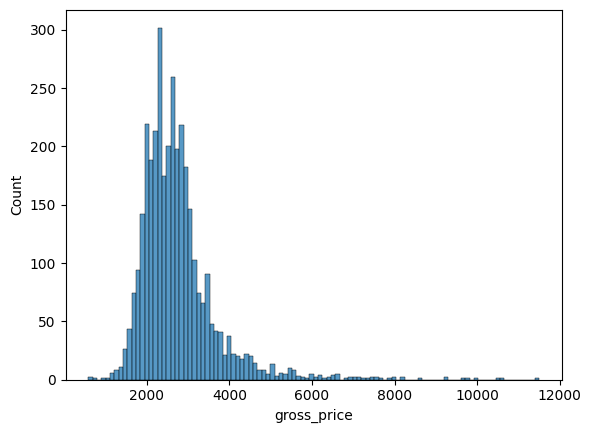

In [8]:
sns.histplot(data = df, x = df["gross_price"])

<Axes: xlabel='room_num', ylabel='Count'>

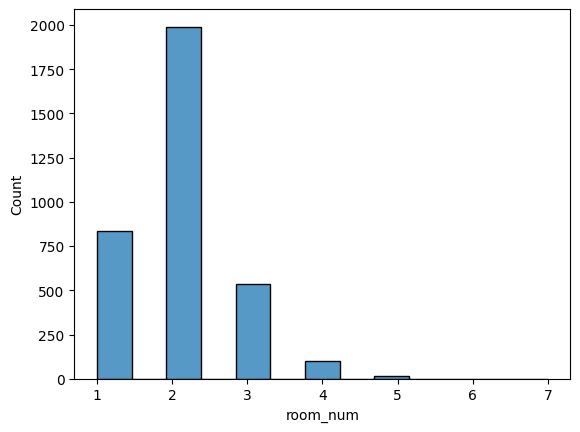

In [9]:
sns.histplot(data = df, x = df["room_num"])